In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


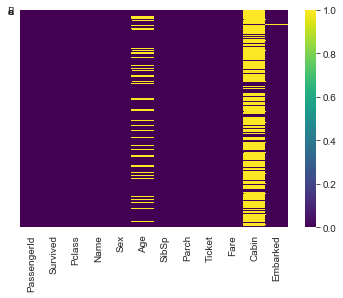

In [8]:
sns.set_style('whitegrid')
sns.heatmap(df.isnull(),yticklabels='False',cmap='viridis')

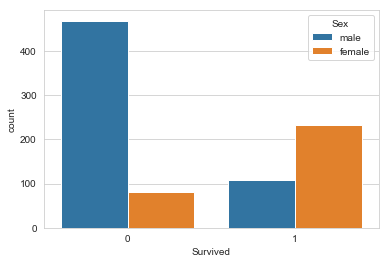

In [11]:
sns.countplot(x='Survived',hue='Sex',data=df)

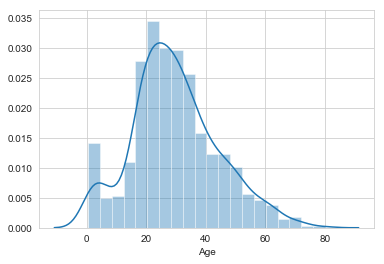

In [14]:
sns.distplot(df['Age'].dropna())

In [15]:
import cufflinks as cf
cf.go_offline()

In [20]:
df['Fare'].dropna().iplot(kind='hist',bins=100)

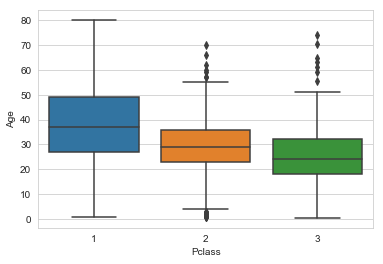

In [21]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [25]:
def impute(col):
    age=col[0]
    Pclass=col[1]
    if pd.isnull(age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return age
df['Age']=df[['Age','Pclass']].apply(impute,axis=1)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,NaN,S


In [27]:
df.drop('Cabin',inplace=True,axis=1)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S


In [29]:
df.dropna(inplace=True)

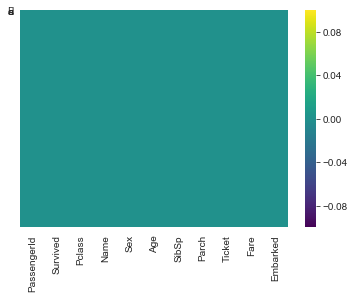

In [35]:
sns.heatmap(df.isnull(),yticklabels='False',cmap='viridis')

In [36]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [38]:
emb=pd.get_dummies(df['Embarked'],drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [40]:
df=pd.concat([df,sex,emb],axis=1)

In [41]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,24.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,37.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,24.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,37.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,24.0,0,0,373450,8.0500,S,1,0,1


In [43]:
df.drop(['Name','Sex','Ticket','Embarked'],inplace=True,axis=1)

In [44]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24.0,1,0,7.2500,1,0,1
1,2,1,1,37.0,1,0,71.2833,0,0,0
2,3,1,3,24.0,0,0,7.9250,0,0,1
3,4,1,1,37.0,1,0,53.1000,0,0,1
4,5,0,3,24.0,0,0,8.0500,1,0,1


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.3,random_state=101)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log=LogisticRegression()

In [48]:
log.fit(x_train,y_train)

D:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [49]:
pred=log.predict(x_test)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

